In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Audio
import soundfile as sf
import tensorflow as tf
import math

In [2]:
seed = 47
np.random.seed(seed)
tf.random.set_seed(seed)

## Import Data - Audio Data

In [3]:
def get_audio_details(data_dir):
    
    #get data paths for .wav files only 
    def retrieve_dataPaths(data_dir):
        raw_paths = tf.io.gfile.glob(str(data_dir) + '/*/*')
        data_paths = []
        for ele in raw_paths:
            if (ele.split('.')[-1] == 'wav'):
                data_paths.append(ele)
                
        return [[x] for x in data_paths]
    
    #get class of audio file
    def get_class(path):
        x = path.split('\\')[-1]
        return x.split('_')[1]
    
    def get_participant(path):
        x = path.split('\\')[-1]
        return x.split('_')[0]
    
    paths = retrieve_dataPaths(data_dir=data_dir)

    for arr in paths:
        audioData, sampleRate = librosa.load(arr[0])
        
        #seperate file load to get bit depth 
        audioData_sf = sf.SoundFile(arr[0])
        bit_depth =audioData_sf.subtype
        bit_depth = bit_depth.split('_')[-1]
        
        #details to array -- Auido Class , audioData.shape (if tuple is one number == mono)
        # num_channels (derived from audioData.shape), sampleRate, bit_depth
        arr.append(arr[0].split('\\')[-1].split('.')[0])
        arr.append(get_class(arr[0]))
        arr.append(get_participant(arr[0]))
        arr.append(audioData)
        arr.append(audioData.shape)
        arr.append(len(audioData.shape))
        arr.append(sampleRate)
        arr.append(bit_depth)
    
    #make into a dataframe
    
    df = pd.DataFrame(data = paths, columns = ['Audio Path','Mapped Audio File' ,'Audio Class', 'Participant','Waveform Array','Waveform shape', 'Num_Channels', 'Sample Rate (Hz)', 'Bit Depth'])
    return df
        

In [4]:
#fixed = participant was told to say the sound in a particular way 
fixed_audio_df = get_audio_details("D:\\Instrument Sounds\\Beat Box Samples\\AVP_Dataset\\AVP_Dataset\\Fixed")
fixed_audio_df['Modality'] = 'Fixed'

#personal = how to participant interpruts a certain type of drum hit 
personal_audio_df = get_audio_details("D:\\Instrument Sounds\\Beat Box Samples\\AVP_Dataset\\AVP_Dataset\\Personal")
personal_audio_df['Modality'] = 'Personal'

In [5]:
fixed_audio_df.head()

,Audio Path,Mapped Audio File,Audio Class,Participant,Waveform Array,Waveform shape,Num_Channels,Sample Rate (Hz),Bit Depth,Modality
0,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P1_HHclosed_Fixed,HHclosed,P1,"[-4.887469e-05, 0.00019735562, 4.839759e-05, -...","(262272,)",1,22050,16,Fixed
1,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P1_Improvisation_Fixed,Improvisation,P1,"[0.0023070332, 0.0021306546, 0.0018239031, 0.0...","(215040,)",1,22050,16,Fixed
2,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P1_Snare_Fixed,Snare,P1,"[-0.008689523, 0.015798561, 0.0113876695, -0.0...","(244096,)",1,22050,16,Fixed
3,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P1_HHopened_Fixed,HHopened,P1,"[-0.00078013726, 0.0009812985, 0.00015700515, ...","(259200,)",1,22050,16,Fixed
4,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P1_Kick_Fixed,Kick,P1,"[-0.0056302277, -0.008950207, -0.010290684, -0...","(246912,)",1,22050,16,Fixed


In [6]:
fixed_audio_df.shape

(140, 10)

In [7]:
personal_audio_df.head()

,Audio Path,Mapped Audio File,Audio Class,Participant,Waveform Array,Waveform shape,Num_Channels,Sample Rate (Hz),Bit Depth,Modality
0,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P23_Snare_Personal,Snare,P23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(308608,)",1,22050,16,Personal
1,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P23_Kick_Personal,Kick,P23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(305920,)",1,22050,16,Personal
2,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P23_Improvisation_Personal,Improvisation,P23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(460800,)",1,22050,16,Personal
3,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P23_HHclosed_Personal,HHclosed,P23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(306944,)",1,22050,16,Personal
4,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P23_HHopened_Personal,HHopened,P23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(307200,)",1,22050,16,Personal


In [8]:
personal_audio_df.shape

(140, 10)

In [9]:
audio_df = pd.concat([fixed_audio_df,personal_audio_df])
audio_df

,Audio Path,Mapped Audio File,Audio Class,Participant,Waveform Array,Waveform shape,Num_Channels,Sample Rate (Hz),Bit Depth,Modality
0,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P1_HHclosed_Fixed,HHclosed,P1,"[-4.887469e-05, 0.00019735562, 4.839759e-05, -...","(262272,)",1,22050,16,Fixed
1,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P1_Improvisation_Fixed,Improvisation,P1,"[0.0023070332, 0.0021306546, 0.0018239031, 0.0...","(215040,)",1,22050,16,Fixed
2,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P1_Snare_Fixed,Snare,P1,"[-0.008689523, 0.015798561, 0.0113876695, -0.0...","(244096,)",1,22050,16,Fixed
3,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P1_HHopened_Fixed,HHopened,P1,"[-0.00078013726, 0.0009812985, 0.00015700515, ...","(259200,)",1,22050,16,Fixed
4,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P1_Kick_Fixed,Kick,P1,"[-0.0056302277, -0.008950207, -0.010290684, -0...","(246912,)",1,22050,16,Fixed
...,...,...,...,...,...,...,...,...,...,...
135,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P17_Kick_Personal,Kick,P17,"[4.89846e-05, 0.000115429946, 6.706007e-05, 2....","(254208,)",1,22050,16,Personal
136,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P17_Snare_Personal,Snare,P17,"[6.4599226e-05, 0.0001061433, 8.244157e-05, 5....","(227840,)",1,22050,16,Personal
137,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P17_Improvisation_Personal,Improvisation,P17,"[4.52157e-05, -7.8665085e-05, -1.0188567e-05, ...","(234496,)",1,22050,16,Personal
138,D:\Instrument Sounds\Beat Box Samples\AVP_Data...,P17_HHclosed_Personal,HHclosed,P17,"[6.9679445e-05, 3.9384337e-05, 0.000112729365,...","(227328,)",1,22050,16,Personal


In [10]:
audio_df.shape

(280, 10)

In [11]:
audio_df['Bit Depth'].value_counts()

Bit Depth
16    280
Name: count, dtype: int64

In [12]:
audio_df['Num_Channels'].value_counts()

Num_Channels
1    280
Name: count, dtype: int64

In [13]:
audio_df['Sample Rate (Hz)'].value_counts()

Sample Rate (Hz)
22050    280
Name: count, dtype: int64

In [14]:
audio_df['Audio Class'].value_counts()

Audio Class
HHclosed         56
Improvisation    56
Snare            56
HHopened         56
Kick             56
Name: count, dtype: int64

## Import Data - Audio Onset Data

In [15]:
def get_onset_labels(data_dir):
    
    def get_participant(path):
        x = path.split('\\')[-1]
        return x.split('_')[0]
    
    def get_modality(path):
        x = path.split('\\')[-1]
        x = x.split('_')[-1]
        return x.split('.')[0]
    
    
    raw_paths = tf.io.gfile.glob(str(data_dir) + '/*/*')
    csv_paths = [path for path in raw_paths if path.split('.')[-1] == 'csv']
    
    csv_info = []
    
    #make into a dataFrame --> Participant, modality, onset, class
    for path in csv_paths:
        #load data frame
        df = pd.read_csv(path, header = None)
        df.columns = ['Onset', 'Class']
        
        df['Participant'] = get_participant(path)
        df['Modality'] = get_modality(path)
        df['Mapped Audio File'] = path.split('\\')[-1].split('.')[0]
        
        csv_info.append(df)
        

    return pd.concat(csv_info)

In [16]:
fixed_onsets = get_onset_labels("D:\\Instrument Sounds\\Beat Box Samples\\AVP_Dataset\\AVP_Dataset\\Fixed")
personal_onsets = get_onset_labels("D:\\Instrument Sounds\\Beat Box Samples\\AVP_Dataset\\AVP_Dataset\\Personal")

audio_onsets = pd.concat([fixed_onsets, personal_onsets])
audio_onsets

,Onset,Class,Participant,Modality,Mapped Audio File
0,0.000000,kd,P1,Fixed,P1_Improvisation_Fixed
1,0.314921,kd,P1,Fixed,P1_Improvisation_Fixed
2,0.680816,sd,P1,Fixed,P1_Improvisation_Fixed
3,1.369796,kd,P1,Fixed,P1_Improvisation_Fixed
4,1.733878,kd,P1,Fixed,P1_Improvisation_Fixed
...,...,...,...,...,...
30,7.673469,sd,P13,Personal,P13_Improvisation_Personal
31,8.005397,hhc,P13,Personal,P13_Improvisation_Personal
32,8.141497,kd,P13,Personal,P13_Improvisation_Personal
33,8.446259,kd,P13,Personal,P13_Improvisation_Personal


In [17]:
audio_onsets.shape

(9869, 5)

## Analyze Audio Files - Raw

In [18]:
#plot a random audio clip that 
def plot_waveform(audioDF, audioOnsets, drumType, modality):
    
    #get audio example specified by parameters
    drum_data_ex = audio_df[(audio_df["Audio Class"] == drumType) & (audio_df['Modality'] == modality)].iloc[0]
    
    wave_arr = drum_data_ex['Waveform Array']

    sr = drum_data_ex['Sample Rate (Hz)']
    plt.figure(figsize=(10,4))
    librosa.display.waveshow(wave_arr, sr = sr)
    title = drumType + ' - ' + modality
    
    cut_df = audioOnsets[audioOnsets['Mapped Audio File'] == drum_data_ex['Mapped Audio File']]['Onset'].values

    for cut in cut_df:
        plt.axvline(x = cut, color = 'r', label = 'axvline - full height')
    
    
    
    plt.title(title)
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show() 

### Kick - Fixed

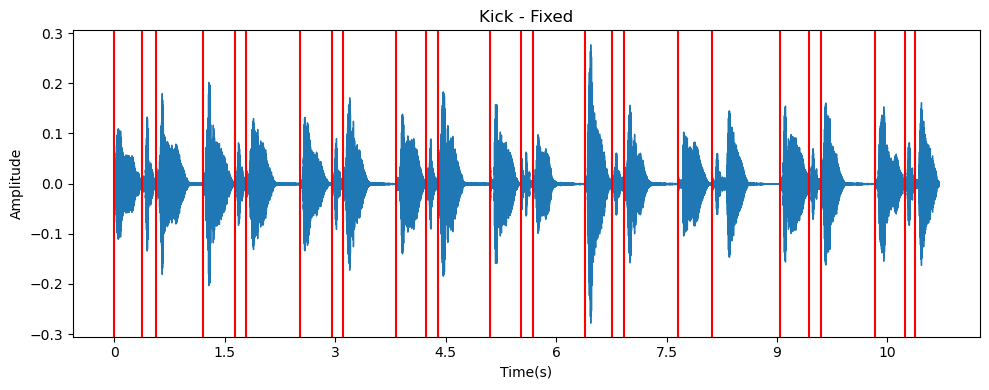

In [19]:
plot_waveform(audio_df, audio_onsets, 'Kick', 'Fixed')

In [20]:
Audio(audio_df[(audio_df["Audio Class"] == 'Kick') & (audio_df['Modality'] == 'Fixed')].iloc[0]['Audio Path'])

### Kick - Personal

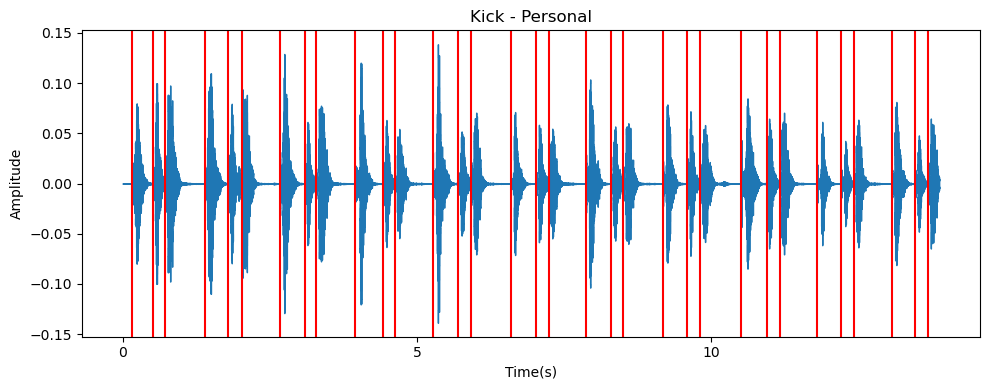

In [21]:
plot_waveform(audio_df, audio_onsets, 'Kick', 'Personal')

### Snare - Fixed

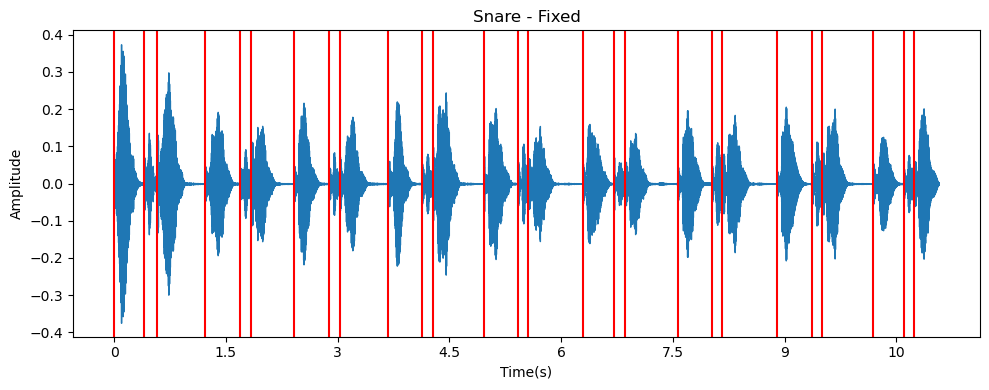

In [22]:
plot_waveform(audio_df, audio_onsets, 'Snare', 'Fixed')

### Snare - Personal

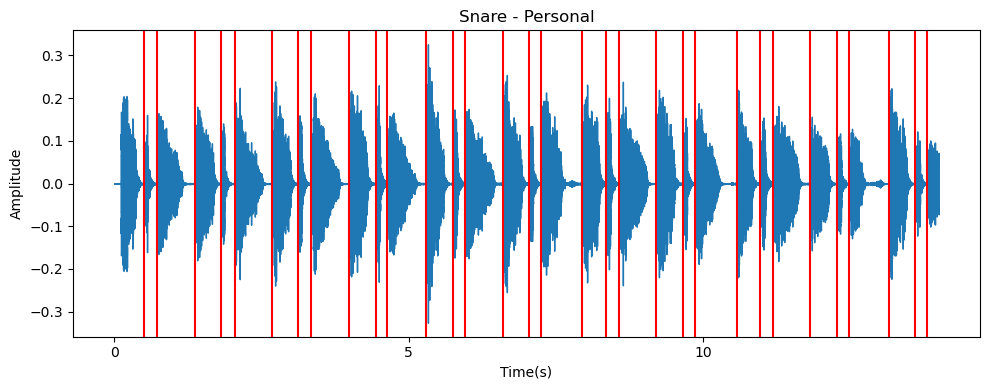

In [23]:
plot_waveform(audio_df, audio_onsets, 'Snare', 'Personal')

### HH Closed - Fixed

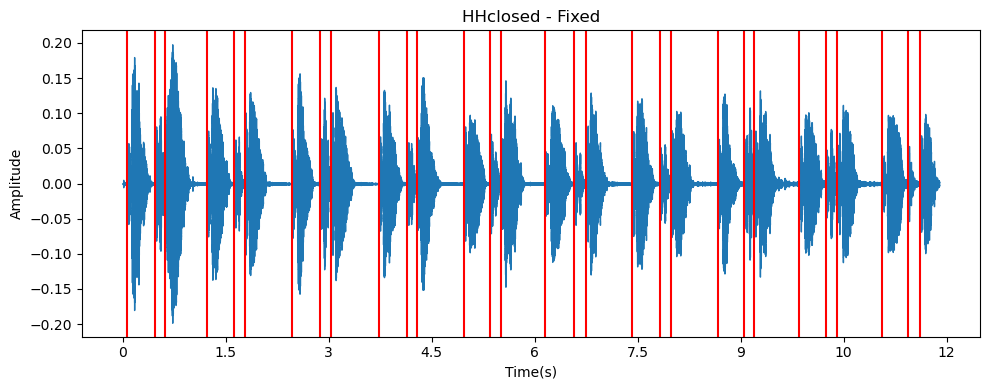

In [24]:
plot_waveform(audio_df, audio_onsets, 'HHclosed', 'Fixed')

### HHclosed - Personal

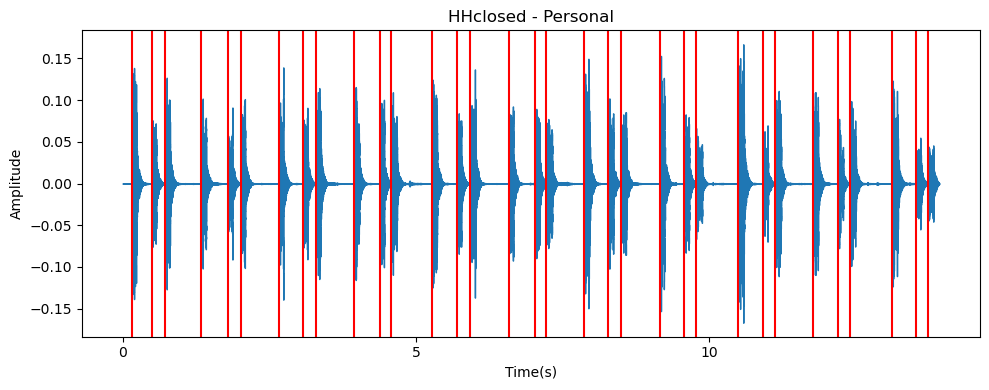

In [25]:
plot_waveform(audio_df, audio_onsets, 'HHclosed', 'Personal')

### HH Open - Fixed

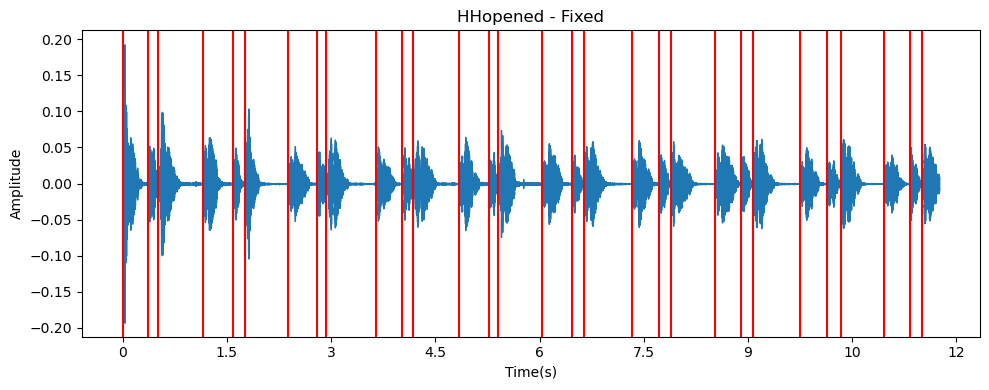

In [26]:
plot_waveform(audio_df, audio_onsets, 'HHopened', 'Fixed')

### HHopen - Personal

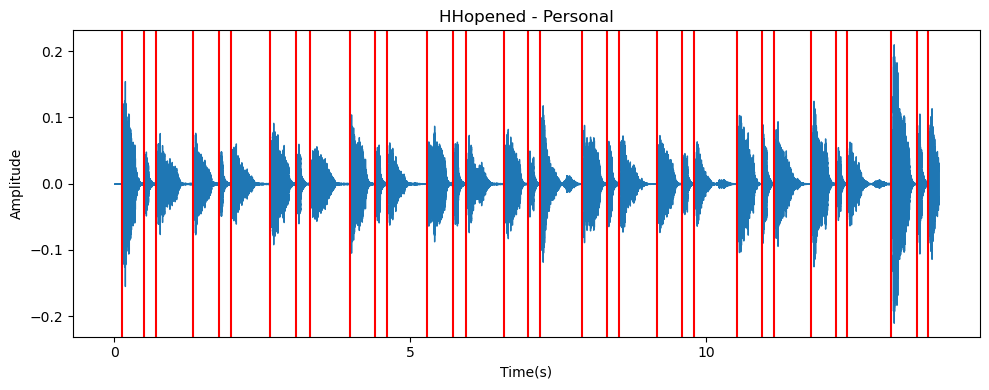

In [27]:
plot_waveform(audio_df, audio_onsets, 'HHopened', 'Personal')

### Improvisation - Fixed

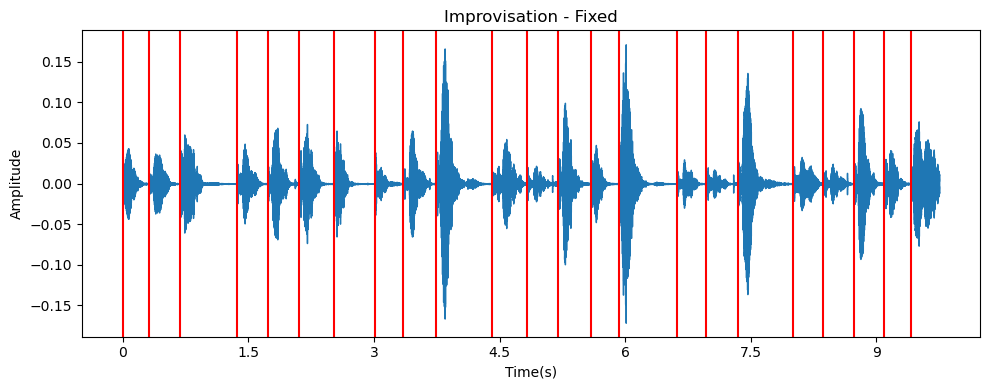

In [28]:
plot_waveform(audio_df, audio_onsets, 'Improvisation', 'Fixed')

### Improv - Personal

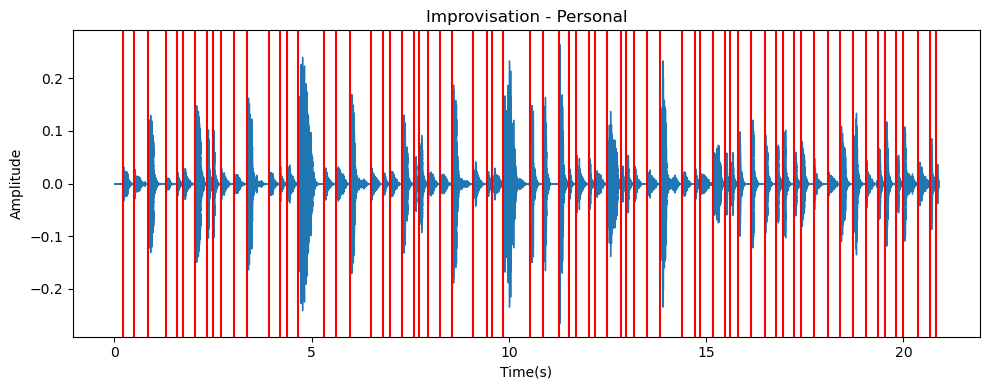

In [29]:
plot_waveform(audio_df, audio_onsets, 'Improvisation', 'Personal')

## Cleaning Process

In [30]:
def seperate_waveforms(audio_df, onset_df):
    final = []
    
    for i in range(audio_df.shape[0]):
        #get onsets for this particular row - info 
        clip_onset_df = onset_df[onset_df['Mapped Audio File'] == audio_df.iloc[i]['Mapped Audio File']]
        
        #get onset values for clip 
        raw_onsets_vals = onset_df[onset_df['Mapped Audio File'] == audio_df.iloc[i]['Mapped Audio File']]['Onset'].values
        
        #convert onset values to timestamps
        onset_idx = librosa.time_to_samples(raw_onsets_vals, sr = audio_df.iloc[i]['Sample Rate (Hz)'])
        
        #split the waveform dependent on onset timestamps, don't take the first one, its basically silence / breathing
        split_waveforms = np.split(audio_df.iloc[i]['Waveform Array'], onset_idx)[1:]
        

        for j in range(clip_onset_df.shape[0]):
            wave_info = []
            wave_info.append(audio_df.iloc[i]['Mapped Audio File'])
            wave_info.append(audio_df.iloc[i]['Modality'])
            wave_info.append(audio_df.iloc[i]['Participant'])
            drum_class = clip_onset_df['Class'].iloc[j]
            drum_class = drum_class.replace(" ", "")
            wave_info.append(drum_class)
            wave_info.append(split_waveforms[j])
            wave_info.append(audio_df.iloc[i]['Sample Rate (Hz)'])
        
            final.append(wave_info)
        
        
        
    cols = ['Mapped Audio File', 'Modality', 'Participant', 'Class', 'Waveform Array', 'Sample Rate (Hz)']
    return pd.DataFrame(data = final, columns = cols)

In [31]:
split_waves = seperate_waveforms(audio_df, audio_onsets)
split_waves

,Mapped Audio File,Modality,Participant,Class,Waveform Array,Sample Rate (Hz)
0,P1_HHclosed_Fixed,Fixed,P1,hhc,"[-0.0004257633, 8.6313914e-05, -9.346378e-05, ...",22050
1,P1_HHclosed_Fixed,Fixed,P1,hhc,"[-8.792826e-05, 0.00100578, -0.0010827456, -0....",22050
2,P1_HHclosed_Fixed,Fixed,P1,hhc,"[0.011110313, 0.014635551, 0.01721415, 0.01731...",22050
3,P1_HHclosed_Fixed,Fixed,P1,hhc,"[3.6741374e-05, -0.00036925392, -0.00032613426...",22050
4,P1_HHclosed_Fixed,Fixed,P1,hhc,"[-0.0003589848, -0.00026326766, 0.00011405721,...",22050
...,...,...,...,...,...,...
9864,P17_HHopened_Personal,Personal,P17,hho,"[-0.00013550417, 1.266785e-05, 0.00025058724, ...",22050
9865,P17_HHopened_Personal,Personal,P17,hho,"[0.008155403, 0.00748085, -0.0050184126, -0.00...",22050
9866,P17_HHopened_Personal,Personal,P17,hho,"[9.410456e-05, -0.00012324145, -2.0147068e-05,...",22050
9867,P17_HHopened_Personal,Personal,P17,hho,"[0.00021577068, 0.00014042645, 0.00019616354, ...",22050


### EDA

In [32]:
split_waves.iloc[0]

Mapped Audio File                                    P1_HHclosed_Fixed
Modality                                                         Fixed
Participant                                                         P1
Class                                                              hhc
Waveform Array       [-0.0004257633, 8.6313914e-05, -9.346378e-05, ...
Sample Rate (Hz)                                                 22050
Name: 0, dtype: object

In [33]:
librosa.get_duration(y = split_waves['Waveform Array'].iloc[0] , sr = split_waves['Sample Rate (Hz)'].iloc[0])

0.4051700680272109

**Trick:** to get duration of an audio clip, do len(wave arr) / Sample rate

In [34]:
np.shape(split_waves['Waveform Array'].iloc[0])[0] / 22050

0.4051700680272109

In [35]:
len(split_waves['Waveform Array'].iloc[0])

8934

In [36]:
x = librosa.util.fix_length(split_waves['Waveform Array'].iloc[0], size = 22050 * 2)
len(x)

44100

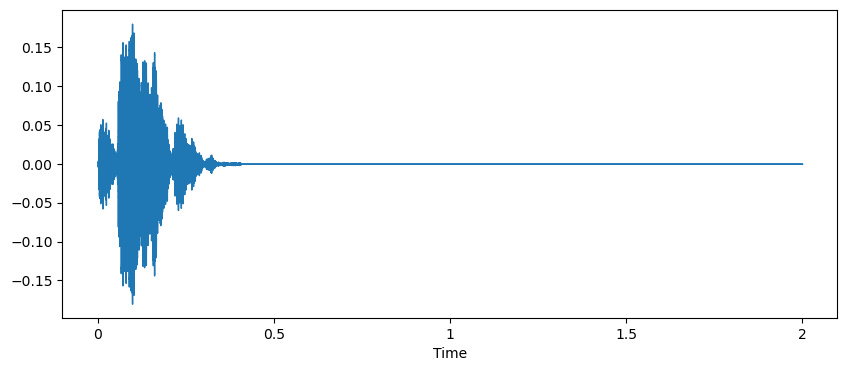

In [37]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(x, sr = 22050)

In [38]:
x.mean()

-2.3953326e-06

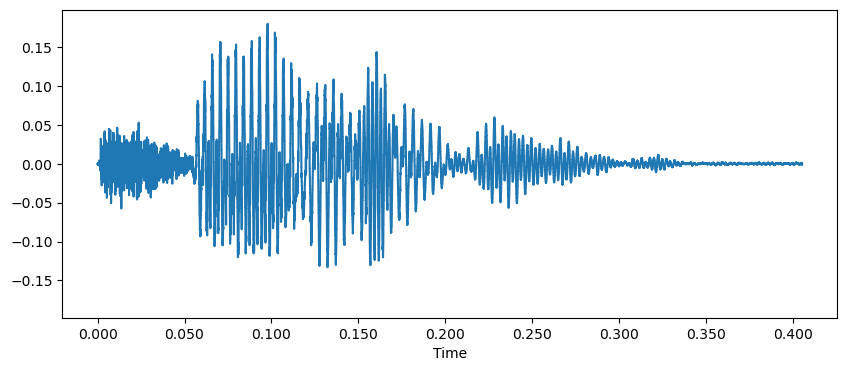

In [39]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(split_waves['Waveform Array'].iloc[0], sr = 22050)

In [40]:
Audio(split_waves['Waveform Array'].iloc[0], rate = split_waves['Sample Rate (Hz)'].iloc[0])

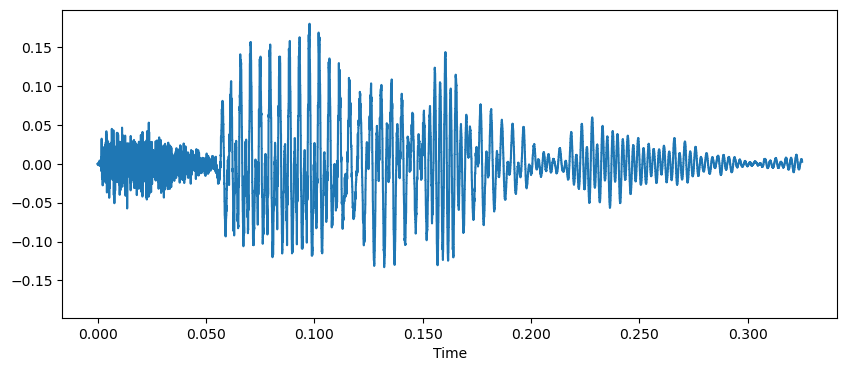

In [41]:
t,_ = librosa.effects.trim(split_waves['Waveform Array'].iloc[0], top_db =20)
plt.figure(figsize=(10,4))
librosa.display.waveshow(t, sr = 22050)

In [42]:
Audio(t, rate = 22050)

### Continue Cleaning

In [ ]:
WINDOW_SIZE = 500
HOP_LENGTH = int(WINDOW_SIZE/ 2)

# used to analyze chunks of a clip in the freq. domain 
def stft(signal, window_size, hop_length):
    
    n_frames = 1 + (len(signal) - window_size) // hop_length
    stft_matrix = np.empty((window_size // 2 + 1, n_frames), dtype=complex)

    for i in range(n_frames):
        frame = signal[i * hop_length: i * hop_length + window_size]
        windowed_frame = frame * np.hamming(window_size)
        stft_matrix[:, i] = np.fft.rfft(windowed_frame)

    return stft_matrix


def plot_spectrogram(stft_matrix, sample_rate, hop_length):
    
    magnitude_spectrogram = np.abs(stft_matrix)
    log_spectrogram = librosa.amplitude_to_db(magnitude_spectrogram)
    
    plt.figure()
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="linear")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    plt.show()
    


def Mel_Spectrograms(sample, sr, window, hop):
    #n_fft = window, hop_length = hop
    mel_spect = librosa.feature.melspectrogram(y=sample, sr=sr )
    mel_spect = librosa.power_to_db(mel_spect ,ref = np.max)
    
    #used if trying to observe the plot in a notebook 

    librosa.display.specshow(mel_spect, y_axis='mel', x_axis='time')
    plt.title('Mel Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

        

In [ ]:
# Trim leading and trailing silence 
def Audio_Cleaning(df):    
    
    data = df.copy()

    og_dur = []
    trim_waves = []
    trim_dur = []
    mel_spectrogram = []
    
    #determine max length & normalize waveform
    for i in range(data.shape[0]):
        
        #get duration of orginal clip
        temp = len(data['Waveform Array'].iloc[i]) / int(data['Sample Rate (Hz)'].iloc[i])
        og_dur.append(temp)
        
        #get trimmed clip
        trim,_ = librosa.effects.trim(data['Waveform Array'].iloc[i], top_db = 20)
        trim_waves.append(trim)
        print(trim)
        
        #get trimmed clip duration
        trim_dur.append(len(trim)/int(data['Sample Rate (Hz)'].iloc[i]))
        
            
        
    data['OG Duration (s)'] = og_dur
    data['Trimmed Waveform'] = trim_waves
    data['Trimmed Duration (s)'] = trim_dur
                        
    return data


In [ ]:
normalized_audio = Audio_Cleaning(split_waves)

normalized_audio.head()

**Check Trim**

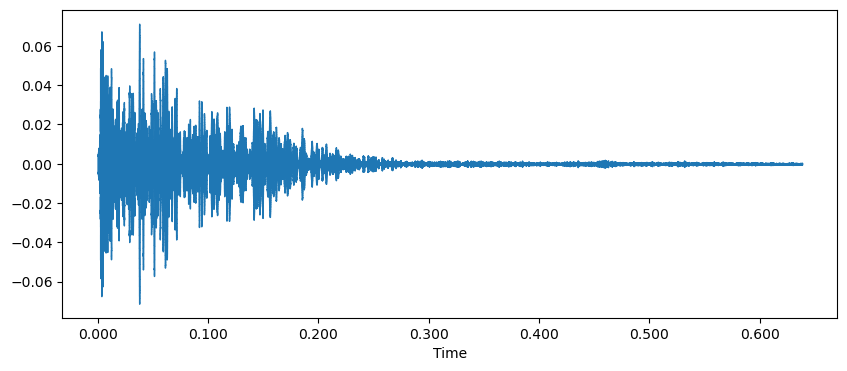

In [46]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(normalized_audio['Waveform Array'].iloc[2], sr = 22050)

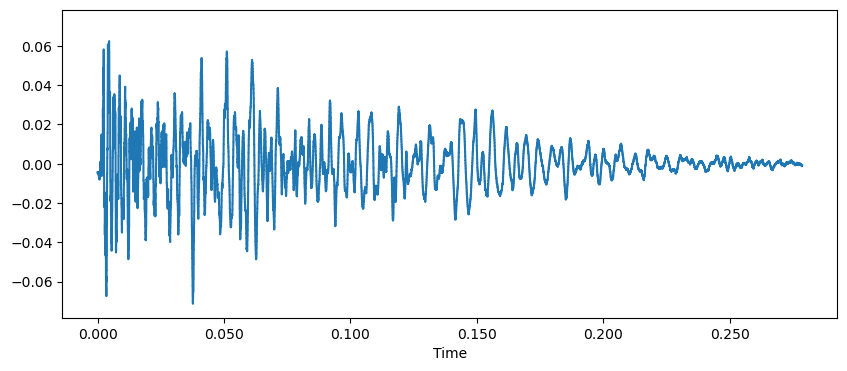

In [47]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(normalized_audio['Trimmed Waveform'].iloc[2], sr = 22050)

**Check Distibution of Trimmed Duration by Class**

In [48]:
normalized_audio = normalized_audio[normalized_audio['Class'] != '']
normalized_audio = normalized_audio[normalized_audio['Class'] != 'pm']
normalized_audio = normalized_audio[normalized_audio['OG Duration (s)'] > 0]

In [49]:
normalized_audio['Class'].unique()

array(['kd', 'hhc', 'hho', 'sd'], dtype=object)

In [50]:
normalized_audio['Class'].value_counts()

Class
kd     2855
sd     2476
hhc    2347
hho    2186
Name: count, dtype: int64

In [51]:
normalized_audio.shape

(9864, 9)

([<matplotlib.axis.XTick at 0x1f85f0c9010>,
 [Text(0.0, 0, '0.00'),
  Text(0.09, 0, '0.09'),
  Text(0.18, 0, '0.18'),
  Text(0.27, 0, '0.27'),
  Text(0.36, 0, '0.36'),
  Text(0.44999999999999996, 0, '0.45'),
  Text(0.54, 0, '0.54'),
  Text(0.63, 0, '0.63'),
  Text(0.72, 0, '0.72'),
  Text(0.8099999999999999, 0, '0.81'),
  Text(0.8999999999999999, 0, '0.90'),
  Text(0.99, 0, '0.99')])

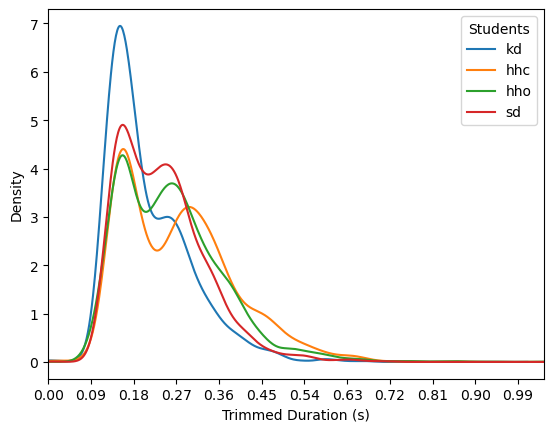

In [52]:
by_class = normalized_audio.groupby('Class')['Trimmed Duration (s)']

by_class.plot(kind='kde')
plt.legend(list(normalized_audio['Class'].unique()), title='Students')
plt.xlabel('Trimmed Duration (s)') 
plt.xlim(0, normalized_audio['Trimmed Duration (s)'].max())
plt.xticks(np.arange(0, normalized_audio['Trimmed Duration (s)'].max(), .09)) 

In [53]:
normalized_audio['Trimmed Duration (s)'].median()

0.23219954648526078

### Spectrograms vs Mel Spectrograms

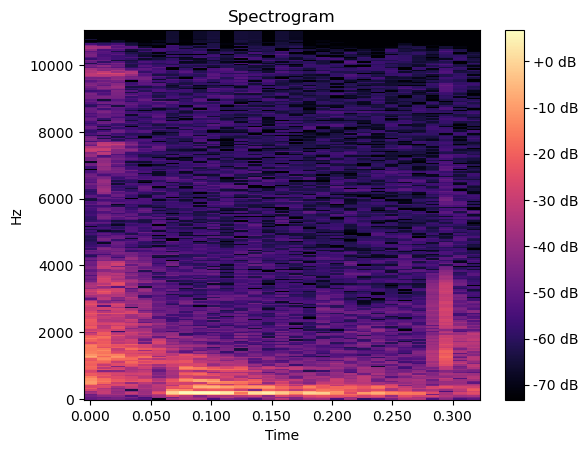

In [54]:
x = stft(normalized_audio['Trimmed Waveform'].iloc[250], WINDOW_SIZE, HOP_LENGTH)
plot_spectrogram(x, 22050, HOP_LENGTH)

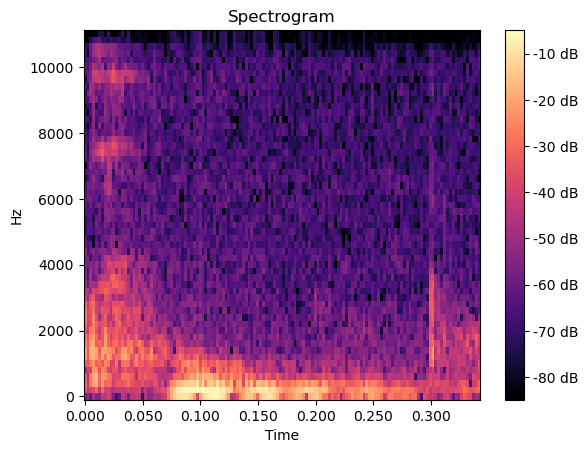

In [55]:
x = stft(normalized_audio['Trimmed Waveform'].iloc[250], 110, 55)
plot_spectrogram(x, 22050, 55)

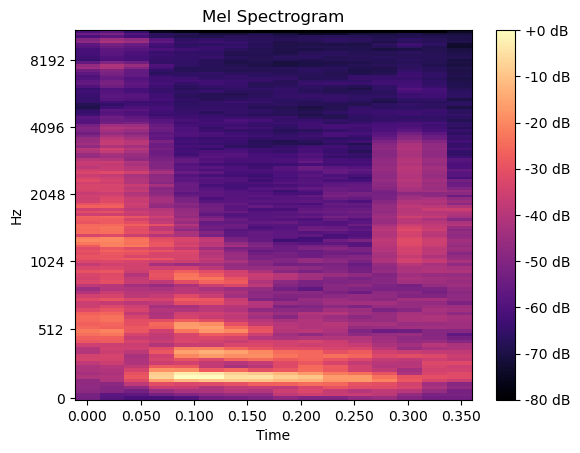

In [56]:
Mel_Spectrograms(normalized_audio['Trimmed Waveform'].iloc[250], 22050, WINDOW_SIZE, HOP_LENGTH)

In [57]:
Audio(normalized_audio['Trimmed Waveform'].iloc[250], rate = 22050)

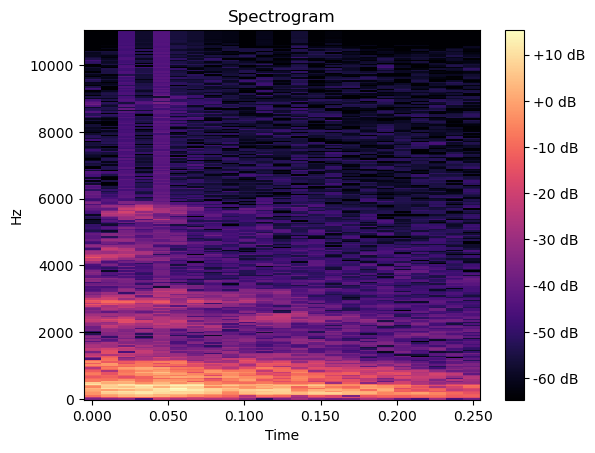

In [58]:
x = stft(normalized_audio['Trimmed Waveform'].iloc[0], WINDOW_SIZE, HOP_LENGTH)
plot_spectrogram(x, 22050, HOP_LENGTH)

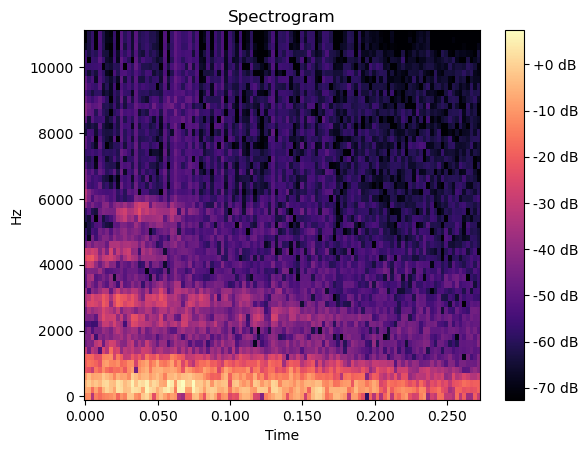

In [59]:
x = stft(normalized_audio['Trimmed Waveform'].iloc[0], 110, 55)
plot_spectrogram(x, 22050, 55)

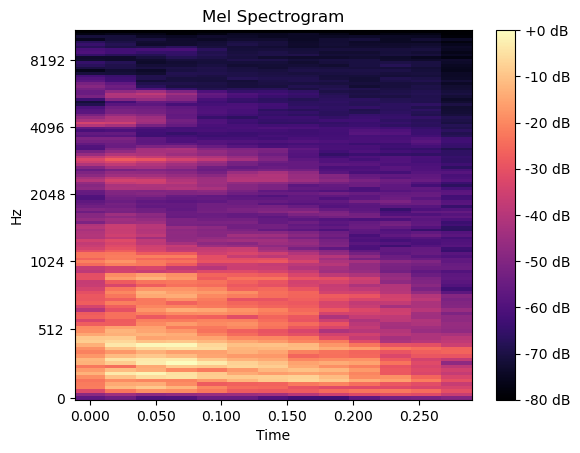

In [60]:
Mel_Spectrograms(normalized_audio['Trimmed Waveform'].iloc[0], 22050, WINDOW_SIZE, HOP_LENGTH)

In [61]:
Audio(normalized_audio['Trimmed Waveform'].iloc[0], rate = 22050)

## Save Mel Spectrograms as Images

In [62]:
normalized_audio.head()

,Mapped Audio File,Modality,Participant,Class,Waveform Array,Sample Rate (Hz),OG Duration (s),Trimmed Waveform,Trimmed Duration (s)
0,P15_Kick_Fixed,Fixed,P15,kd,"[-0.0005359161, -0.0006114482, -0.0007471172, ...",22050,0.507755,"[-0.0005359161, -0.0006114482, -0.0007471172, ...",0.278639
1,P15_Kick_Fixed,Fixed,P15,kd,"[0.0001533432, 0.0005312902, 0.0006751176, 0.0...",22050,0.132472,"[0.0001533432, 0.0005312902, 0.0006751176, 0.0...",0.132472
2,P15_Kick_Fixed,Fixed,P15,kd,"[-0.0045323786, -0.004412074, -0.004185561, -0...",22050,0.638549,"[-0.0045323786, -0.004412074, -0.004185561, -0...",0.278639
3,P15_Kick_Fixed,Fixed,P15,kd,"[3.3045188e-05, 1.8108636e-05, 0.00012554787, ...",22050,0.544218,"[3.3045188e-05, 1.8108636e-05, 0.00012554787, ...",0.301859
4,P15_Kick_Fixed,Fixed,P15,kd,"[-0.001209225, -0.0023541693, -0.0023973759, -...",22050,0.125170,"[-0.001209225, -0.0023541693, -0.0023973759, -...",0.125170


In [63]:
normalized_audio.shape

(9864, 9)

In [64]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


def save_clean_audio_imgs(data, data_path, spec_path):
    df = data.copy()
    L = len(str(df.shape[0]))
    df['Index'] = -1
    
    #create index for csv to be saved
    
    for i in range(df.shape[0]):
        df['Index'].iloc[i] = str(i).zfill(L)
        
        #make image path
        plt_name = '\\'+ df['Mapped Audio File'].iloc[i] +'_'+ df['Class'].iloc[i] +'_'+ df['Index'].iloc[i]
        img_path = spec_path+ plt_name
        
        #get mel spectrogram
        mel_spect = librosa.feature.melspectrogram(y=df['Trimmed Waveform'].iloc[i], sr=df['Sample Rate (Hz)'].iloc[i])
        mel_spect = librosa.power_to_db(mel_spect ,ref = np.max)
        
        
        fig = plt.figure(figsize=(6, 4))
        plt.axis('off')  # Turn off axis for the plot
        
        librosa.display.specshow(mel_spect)
        plt.tight_layout()
        
        fig.savefig(img_path)
        plt.close(fig)
        
    
    
    df_path = data_path+ '\\Audio_details.csv'
    df.to_csv(df_path, index = False)
        
    
    
    return 
    

In [65]:
save_clean_audio_imgs(normalized_audio, "D:\\Instrument Sounds\\Beat Box Samples\\AVP_Dataset\\Image Dataset","D:\\Instrument Sounds\\Beat Box Samples\\AVP_Dataset\\Image Dataset\\Mel Spectrograms" )

C:\Users\micae\AppData\Local\Temp\ipykernel_27656\4249118390.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Index'].iloc[i] = str(i).zfill(L)
C:\Users\micae\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=701
  warnings.warn(
C:\Users\micae\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=29
  warnings.warn(
C:\Users\micae\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1085
  warnings.warn(
C:\Users\micae\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1988
  warnings.warn(
C:\Users\micae\anaconda3\Lib

## A few of the spectrograms are white images, look into this

In [66]:
#0502
#4922
#8042
#4849
#801
#8073
#4694

df = pd.read_csv("D:\\Instrument Sounds\\Beat Box Samples\\AVP_Dataset\\Image Dataset\\Audio_details.csv")
df.head()

,Mapped Audio File,Modality,Participant,Class,Waveform Array,Sample Rate (Hz),OG Duration (s),Trimmed Waveform,Trimmed Duration (s),Index
0,P15_Kick_Fixed,Fixed,P15,kd,[-0.00053592 -0.00061145 -0.00074712 ... 0.00...,22050,0.507755,[-0.00053592 -0.00061145 -0.00074712 ... -0.00...,0.278639,0
1,P15_Kick_Fixed,Fixed,P15,kd,[ 0.00015334 0.00053129 0.00067512 ... -0.00...,22050,0.132472,[ 0.00015334 0.00053129 0.00067512 ... -0.00...,0.132472,1
2,P15_Kick_Fixed,Fixed,P15,kd,[-0.00453238 -0.00441207 -0.00418556 ... -0.00...,22050,0.638549,[-0.00453238 -0.00441207 -0.00418556 ... -0.00...,0.278639,2
3,P15_Kick_Fixed,Fixed,P15,kd,[ 3.3045188e-05 1.8108636e-05 1.2554787e-04 ...,22050,0.544218,[3.3045188e-05 1.8108636e-05 1.2554787e-04 ......,0.301859,3
4,P15_Kick_Fixed,Fixed,P15,kd,[-0.00120923 -0.00235417 -0.00239738 ... -0.00...,22050,0.125170,[-0.00120923 -0.00235417 -0.00239738 ... -0.00...,0.125170,4


In [72]:
Mel_Spectrograms(np.fromstring(df['Trimmed Waveform'].iloc[0]), int(df['Sample Rate (Hz)'].iloc[0]), WINDOW_SIZE, HOP_LENGTH)

C:\Users\micae\AppData\Local\Temp\ipykernel_27656\4087479702.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  Mel_Spectrograms(np.fromstring(df['Trimmed Waveform'].iloc[0]), int(df['Sample Rate (Hz)'].iloc[0]), WINDOW_SIZE, HOP_LENGTH)
C:\Users\micae\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=59
  warnings.warn(
C:\Users\micae\anaconda3\Lib\site-packages\librosa\core\spectrum.py:2821: RuntimeWarning: overflow encountered in square
  np.abs(


IndexError: cannot do a non-empty take from an empty axes.

In [73]:
np.fromstring(df['Trimmed Waveform'].iloc[0])

C:\Users\micae\AppData\Local\Temp\ipykernel_27656\4041027552.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  np.fromstring(df['Trimmed Waveform'].iloc[0])


array([2.09029143e-076, 2.57719660e-057, 7.50131240e-067, 2.57719661e-057,
       5.40127990e-062, 2.57719664e-057, 8.98063116e-067, 1.68899160e-052,
       1.65582597e-047, 1.26931636e-076, 1.65555869e-047, 1.26931700e-076,
       3.05996896e-057, 1.26931502e-076, 5.15531508e-062, 1.26931371e-076,
       7.70400215e-043, 5.20748554e-090, 7.25555893e-043, 5.20555676e-090,
       2.10694869e-052, 5.20366153e-090, 1.68931646e-052, 5.20459787e-090,
       1.30455491e-076, 3.60030756e+179, 4.43630046e-038, 3.43949822e+179,
       1.03304712e-047, 3.92576964e+179, 1.57670228e-052, 2.95068434e+179,
       3.44353282e-086, 2.90129419e-057, 3.64460980e-086, 3.69410152e-057,
       3.44353334e-086, 3.69552860e-033, 3.44353333e-086, 2.00416570e-052,
       8.24212697e-072, 1.48676647e-076, 5.40167914e-067, 3.94083943e-062,
       8.24230826e-072, 3.89112205e-033, 5.40167914e-067, 1.40007136e-076,
       2.46066144e-091, 1.48508496e-076, 2.48582075e-091, 9.16446199e-072,
       2.48582075e-091, 4